In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
### Database sestup:
# create engine (just means preparing to connect to the sqlite database)
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base() # to creates a base class for an automap schema in SQLAlchemy.
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB (allow us to query the data)
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the last data point in the database. 

# Calculate the date one year from the last date in data set.

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [11]:
# Calculate the date one year from the last date in data set.
# Assuming we are looking at data 1 year prior to 8/23/2017:
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

In [12]:
# Perform a query to retrieve the data and precipitation scores
# creating a variable to store the results of the query
results = []
# Create a query to get date and prcp from the measurement class (or mapped table)
results = session.query(Measurement.date, Measurement.prcp)

In [13]:
print(results.all())

[('2010-01-01', 0.08), ('2010-01-02', 0.0), ('2010-01-03', 0.0), ('2010-01-04', 0.0), ('2010-01-06', None), ('2010-01-07', 0.06), ('2010-01-08', 0.0), ('2010-01-09', 0.0), ('2010-01-10', 0.0), ('2010-01-11', 0.01), ('2010-01-12', 0.0), ('2010-01-14', 0.0), ('2010-01-15', 0.0), ('2010-01-16', 0.0), ('2010-01-17', 0.0), ('2010-01-18', 0.0), ('2010-01-19', 0.0), ('2010-01-20', 0.0), ('2010-01-21', 0.0), ('2010-01-22', 0.0), ('2010-01-23', 0.0), ('2010-01-24', 0.01), ('2010-01-25', 0.0), ('2010-01-26', 0.04), ('2010-01-27', 0.12), ('2010-01-28', 0.0), ('2010-01-30', None), ('2010-01-31', 0.03), ('2010-02-01', 0.01), ('2010-02-03', None), ('2010-02-04', 0.01), ('2010-02-05', 0.0), ('2010-02-06', 0.0), ('2010-02-07', 0.0), ('2010-02-08', 0.0), ('2010-02-09', 0.0), ('2010-02-11', 0.0), ('2010-02-12', 0.02), ('2010-02-13', 0.01), ('2010-02-14', 0.0), ('2010-02-15', 0.0), ('2010-02-16', 0.0), ('2010-02-17', 0.0), ('2010-02-19', None), ('2010-02-20', 0.03), ('2010-02-21', 0.0), ('2010-02-22', 0.

In [14]:
# Now add date filter to the query:
    # .all() : extract all data result from the query and add into the 'results' variable
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()

In [15]:
print(results)

[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

In [16]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])

In [17]:
# set the date as index with inplace = True (else, it will temporarily created a 'fake' df with no var assigned, thus will be lost)
df.set_index(df['date'], inplace=True)
df

,date,precipitation
date,,
2016-08-23,2016-08-23,0.00
2016-08-24,2016-08-24,0.08
2016-08-25,2016-08-25,0.08
2016-08-26,2016-08-26,0.00
2016-08-27,2016-08-27,0.00
...,...,...
2017-08-19,2017-08-19,0.09
2017-08-20,2017-08-20,NaN
2017-08-21,2017-08-21,0.56


In [18]:
# print the df as string without the index:
print(df.to_string(index=False))

       date  precipitation
 2016-08-23           0.00
 2016-08-24           0.08
 2016-08-25           0.08
 2016-08-26           0.00
 2016-08-27           0.00
 2016-08-28           0.01
 2016-08-29           0.00
 2016-08-30           0.00
 2016-08-31           0.13
 2016-09-01           0.00
 2016-09-02           0.00
 2016-09-03           0.00
 2016-09-04           0.03
 2016-09-05            NaN
 2016-09-06            NaN
 2016-09-07           0.05
 2016-09-08           0.00
 2016-09-09           0.03
 2016-09-10           0.00
 2016-09-11           0.05
 2016-09-12           0.00
 2016-09-13           0.02
 2016-09-14           1.32
 2016-09-15           0.42
 2016-09-16           0.06
 2016-09-17           0.05
 2016-09-18           0.00
 2016-09-19           0.00
 2016-09-20           0.00
 2016-09-21           0.00
 2016-09-22           0.02
 2016-09-23           0.00
 2016-09-24           0.00
 2016-09-25           0.00
 2016-09-26           0.06
 2016-09-27           0.02
 

In [19]:
# Sort the dataframe by date
df = df.sort_index()
print(df.to_string(index=False))

       date  precipitation
 2016-08-23           0.00
 2016-08-23            NaN
 2016-08-23           1.79
 2016-08-23           0.05
 2016-08-23           0.15
 2016-08-23           0.70
 2016-08-23           0.02
 2016-08-24           0.08
 2016-08-24           2.15
 2016-08-24           2.28
 2016-08-24            NaN
 2016-08-24           1.45
 2016-08-24           1.22
 2016-08-24           2.15
 2016-08-25           0.08
 2016-08-25           0.00
 2016-08-25           0.21
 2016-08-25           0.06
 2016-08-25           0.00
 2016-08-25           0.11
 2016-08-25           0.08
 2016-08-26           0.03
 2016-08-26           0.01
 2016-08-26           0.00
 2016-08-26           0.04
 2016-08-26           0.02
 2016-08-26           0.00
 2016-08-27           0.18
 2016-08-27           0.12
 2016-08-27           0.00
 2016-08-27           0.00
 2016-08-27           0.02
 2016-08-27            NaN
 2016-08-28           0.60
 2016-08-28           0.14
 2016-08-28           0.01
 

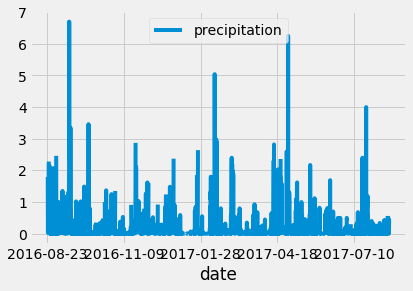

In [20]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()

In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [22]:
# How many stations are available in this dataset?
    # session.query() to start every query in SQLAlchemy
session.query(func.count(Station.station)).all()

[(9)]

In [23]:
# What are the most active stations?

# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [24]:
# Using the station id from the previous query, calculate the lowest/highest/average temperature recorded at the most active station?
    # most actgive station ID from above
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [25]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station in the last year and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
print(results)

[(77.0,), (77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), 

In [26]:
# convert to df:
df = pd.DataFrame(results, columns=['tobs'])
df

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


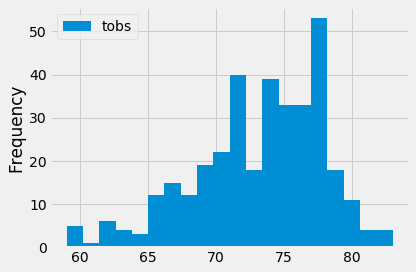

In [27]:
# to histogram, assumed we want to divide into 12 bins:
df.plot.hist(bins=20)
#     compress the x-axis labels so that they fit into the box holding our plot.
plt.tight_layout()

In [28]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
# --> go to app.py

# Challenge

In [34]:
# Extract June data from the Measurement:
June = session.query(func.strftime('%m', Measurement.date), Measurement.prcp, Measurement.tobs).\
filter(func.strftime('%m', Measurement.date) == '06').all()
June


[('06', 0.0, 78.0),
 ('06', 0.01, 76.0),
 ('06', 0.0, 78.0),
 ('06', 0.0, 76.0),
 ('06', 0.0, 77.0),
 ('06', 0.0, 78.0),
 ('06', 0.0, 77.0),
 ('06', 0.0, 78.0),
 ('06', 0.0, 78.0),
 ('06', 0.0, 79.0),
 ('06', 0.0, 78.0),
 ('06', 0.0, 78.0),
 ('06', 0.0, 78.0),
 ('06', 0.0, 77.0),
 ('06', 0.0, 78.0),
 ('06', 0.0, 78.0),
 ('06', 0.0, 77.0),
 ('06', 0.0, 77.0),
 ('06', 0.0, 82.0),
 ('06', 0.0, 78.0),
 ('06', 0.0, 78.0),
 ('06', 0.0, 78.0),
 ('06', 0.0, 78.0),
 ('06', 0.0, 78.0),
 ('06', 0.0, 77.0),
 ('06', 0.02, 76.0),
 ('06', 0.0, 78.0),
 ('06', 0.0, 78.0),
 ('06', 0.0, 78.0),
 ('06', 0.0, 78.0),
 ('06', 0.07, 77.0),
 ('06', 0.0, 78.0),
 ('06', 0.56, 73.0),
 ('06', 0.89, 70.0),
 ('06', 0.0, 76.0),
 ('06', 0.0, 77.0),
 ('06', 0.0, 77.0),
 ('06', 0.03, 77.0),
 ('06', 0.01, 77.0),
 ('06', 0.0, 78.0),
 ('06', 0.0, 77.0),
 ('06', 0.0, 77.0),
 ('06', 0.0, 78.0),
 ('06', 0.0, 78.0),
 ('06', 0.0, 77.0),
 ('06', 0.0, 78.0),
 ('06', 0.0, 78.0),
 ('06', 0.05, 75.0),
 ('06', 0.06, 76.0),
 ('06', 0.0

In [35]:
# convert to df:
June_df = pd.DataFrame(June, columns=['Month', 'Precipitation', 'Temperature'])
June_df

,Month,Precipitation,Temperature
0,06,0.00,78.0
1,06,0.01,76.0
2,06,0.00,78.0
3,06,0.00,76.0
4,06,0.00,77.0
...,...,...,...
1695,06,0.02,79.0
1696,06,0.10,74.0
1697,06,0.02,74.0
1698,06,0.04,76.0


In [37]:
# Similarly for Decembers:
December = session.query(func.strftime('%m', Measurement.date), Measurement.prcp, Measurement.tobs).\
filter(func.strftime('%m', Measurement.date) == '12').all()
December_df = pd.DataFrame(December, columns=['Month', 'Precipitation', 'Temperature'])
December_df

,Month,Precipitation,Temperature
0,12,0.04,76.0
1,12,0.00,74.0
2,12,0.00,74.0
3,12,0.00,64.0
4,12,0.00,64.0
...,...,...,...
1512,12,0.14,71.0
1513,12,0.14,71.0
1514,12,1.03,69.0
1515,12,2.37,65.0


In [38]:
# descibe June temp:
June_df['Temperature'].describe()

count    1700.000000
mean       74.944118
std         3.257417
min        64.000000
25%        73.000000
50%        75.000000
75%        77.000000
max        85.000000
Name: Temperature, dtype: float64

In [40]:
# descibe December temp:
December_df['Temperature'].describe()

count    1517.000000
mean       71.041529
std         3.745920
min        56.000000
25%        69.000000
50%        71.000000
75%        74.000000
max        83.000000
Name: Temperature, dtype: float64

In [41]:
# descibe June Precipitation:
June_df['Precipitation'].describe()

count    1574.000000
mean        0.136360
std         0.335731
min         0.000000
25%         0.000000
50%         0.020000
75%         0.120000
max         4.430000
Name: Precipitation, dtype: float64

In [42]:
# descibe December Precipitation:
December_df['Precipitation'].describe()

count    1405.000000
mean        0.216819
std         0.541399
min         0.000000
25%         0.000000
50%         0.030000
75%         0.150000
max         6.420000
Name: Precipitation, dtype: float64